# Clasificadores

In [25]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [6]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [10]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [1]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

  markers = ('o', 's', '^', 'v', '<')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
  np.arange(x2_min, x2_max, resolution))
  lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  lab = lab.reshape(xx1.shape)
  plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0],
                y=X[y == cl, 1],
                alpha=0.8,
                c=colors[idx],
                marker=markers[idx],
                label=f'Class {cl}',
                edgecolor='black')

  if test_idx:

    X_test, y_test = X[test_idx, :], y[test_idx]
    plt.scatter(X_test[:, 0], X_test[:, 1],
                c='none', edgecolor='black', alpha=1.0,
                linewidth=1, marker='o',
                s=100, label='Test set')

## Logistic regression

$$logit(p)=log\frac{p}{(1-p)}$$
$$logit(p)=\sum_{i=j}w_jx_j+b=\vec{w}^T\vec{x}+b$$


$$\sigma(z)=\frac{1}{1+e^{-z}}$$
$$z=\vec{w}^T\vec{x}+b$$

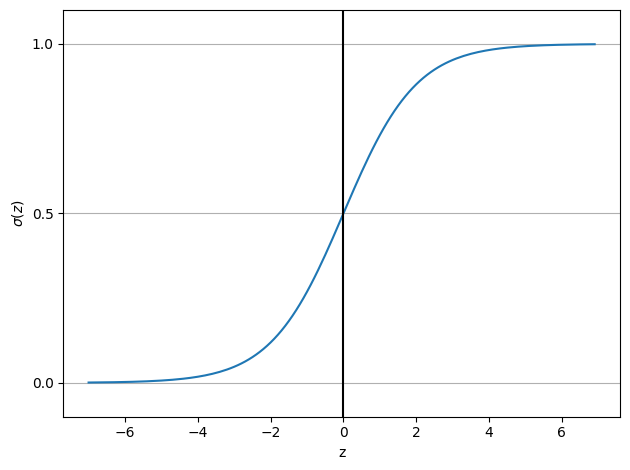

In [13]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
sigma_z = sigmoid(z)

plt.plot(z, sigma_z)
plt.axvline(0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel("$\sigma (z)$")
plt.yticks([0, 0.5, 1])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

$$\hat{y}=\begin{cases}
1 & \text{ if } \sigma(z) \geq 0.5 \\
0 & \text{otherwise}
\end{cases}
$$

Siguiendo el gráfico anterior, esto es equivalente a

$$\hat{y}=\begin{cases}
1 & \text{ if }  z \geq 0 \\
0 & \text{otherwise}
\end{cases}
$$

In [16]:
lr = LogisticRegression(C=100, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)

LogisticRegression(C=100, multi_class='ovr')

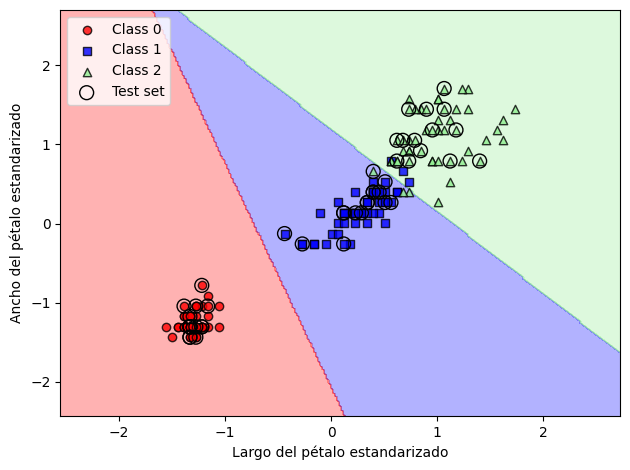

In [18]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=lr,
                      test_idx=range(105, 150))

plt.xlabel('Largo del pétalo estandarizado')
plt.ylabel('Ancho del pétalo estandarizado')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### Hiperparámetros

- penalty: `l1`, `l2`, `elasticnet`
- C: valores más pequeños singifican una regularización más fuerte
- solver: algoritmo de solución
- max_iter: número máximo de iteraciones

## SVM

![Img](https://raw.githubusercontent.com/rasbt/python-machine-learning-book-3rd-edition/bf62496f44a92a21d23250d5ed13d2d2e617e0e2/ch03/images/03_10.png)

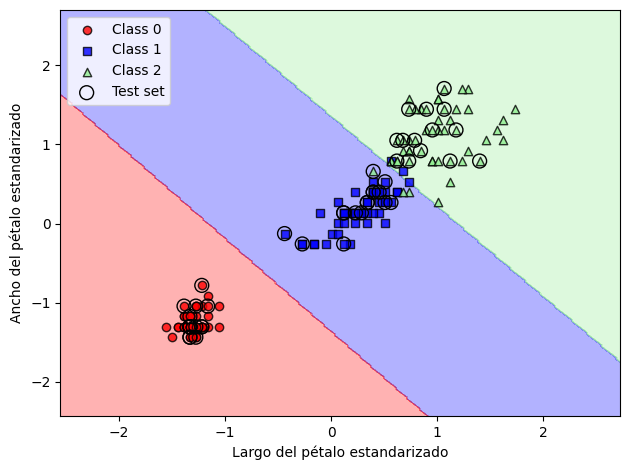

In [21]:
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=svm,
                      test_idx=range(105, 150))

plt.xlabel('Largo del pétalo estandarizado')
plt.ylabel('Ancho del pétalo estandarizado')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Kernel trick

![Img2](https://raw.githubusercontent.com/rasbt/python-machine-learning-book-3rd-edition/bf62496f44a92a21d23250d5ed13d2d2e617e0e2/ch03/images/03_13.png)

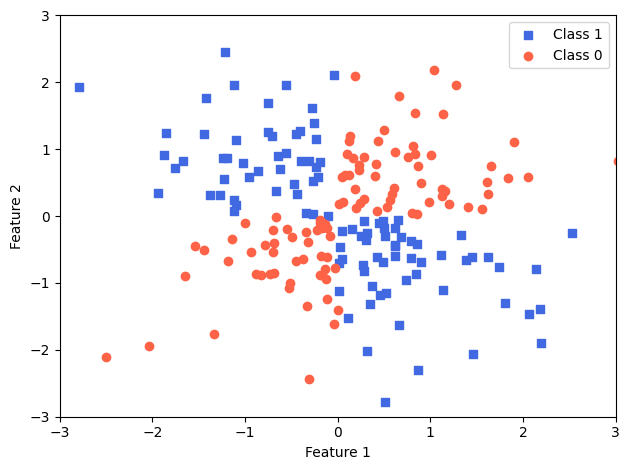

In [22]:
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, 0)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='royalblue', marker='s',
            label='Class 1')

plt.scatter(X_xor[y_xor == 0, 0],
            X_xor[y_xor == 0, 1],
            c='tomato', marker='o',
            label='Class 0')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

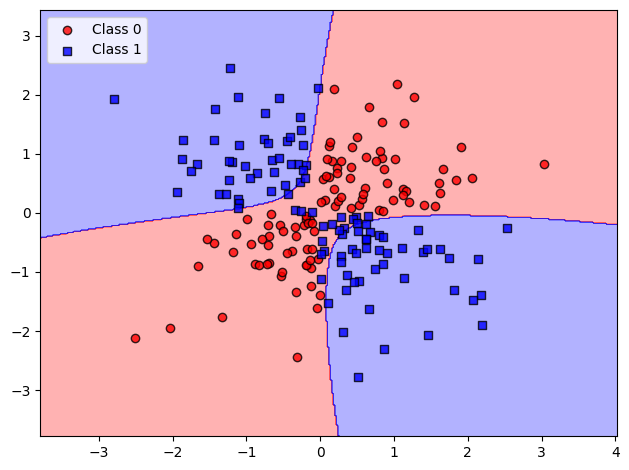

In [23]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

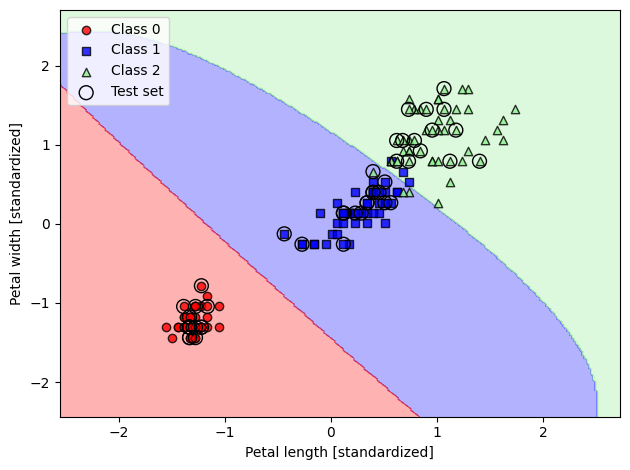

In [24]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std,
                      y_combined, classifier=svm,
                      test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### Hiperparámetros

- C
- kernel


## KNN

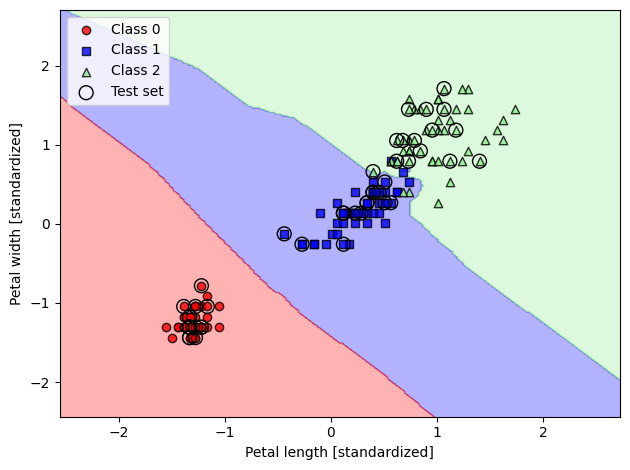

In [26]:
knn = KNeighborsClassifier(n_neighbors=5, p=2,
                          metric='minkowski')
knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                    classifier=knn, test_idx=range(105,150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### Hiperparámetros

- n_neighbors
- metric

Tomado de Raschka, S (2023). con fines educativos.